<a href="https://colab.research.google.com/github/bullbearyBots/tensorflow_certification/blob/main/computer_vision_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset but we modified it to only use two classes (pizza and steak).

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-05-13 15:34:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.174.207, 74.125.23.207, 74.125.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.174.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  25.1MB/s    in 5.0s    

2024-05-13 15:35:01 (20.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project.. this usually means visualizing many samples of our data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}"')

There are 2 directories and 0 images in "pizza_steak"
There are 2 directories and 0 images in "pizza_steak/test"
There are 0 directories and 250 images in "pizza_steak/test/pizza"
There are 0 directories and 250 images in "pizza_steak/test/steak"
There are 2 directories and 0 images in "pizza_steak/train"
There are 0 directories and 750 images in "pizza_steak/train/pizza"
There are 0 directories and 750 images in "pizza_steak/train/steak"


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, first let's get the class names programatically

In [7]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [8]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + '/' + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'Image shape: {img.shape}')

  return img

['1346387.jpg']
Image shape: (512, 512, 3)


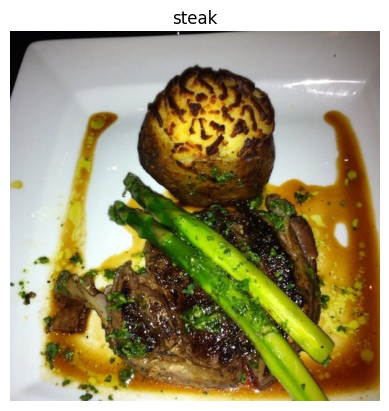

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train', target_class='steak')

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  2,   2,   4],
        [  4,   4,   6],
        [  5,   5,   7],
        ...,
        [104,  93,  89],
        [104,  93,  87],
        [104,  93,  87]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  4,   4,   6],
        ...,
        [106,  95,  91],
        [105,  94,  88],
        [105,  94,  88]],

       [[  4,   4,   6],
        [  3,   3,   5],
        [  2,   2,   4],
        ...,
        [104,  93,  89],
        [103,  92,  86],
        [103,  92,  86]],

       ...,

       [[206, 206, 216],
        [207, 207, 217],
        [208, 208, 218],
        ...,
        [161, 154, 135],
        [159, 152, 133],
        [157, 150, 131]],

       [[207, 207, 219],
        [209, 209, 221],
        [210, 210, 222],
        ...,
        [160, 158, 146],
        [159, 157, 145],
        [157, 155, 143]],

       [[205, 205, 217],
        [207, 207, 219],
        [208, 208, 220],
        ...,
        [160, 160, 15

In [12]:
# View the image shape
img.shape

(512, 512, 3)

In [13]:
# Get all the pixec values between 0 and 1
img/255.

array([[[0.00784314, 0.00784314, 0.01568627],
        [0.01568627, 0.01568627, 0.02352941],
        [0.01960784, 0.01960784, 0.02745098],
        ...,
        [0.40784314, 0.36470588, 0.34901961],
        [0.40784314, 0.36470588, 0.34117647],
        [0.40784314, 0.36470588, 0.34117647]],

       [[0.01176471, 0.01176471, 0.01960784],
        [0.01176471, 0.01176471, 0.01960784],
        [0.01568627, 0.01568627, 0.02352941],
        ...,
        [0.41568627, 0.37254902, 0.35686275],
        [0.41176471, 0.36862745, 0.34509804],
        [0.41176471, 0.36862745, 0.34509804]],

       [[0.01568627, 0.01568627, 0.02352941],
        [0.01176471, 0.01176471, 0.01960784],
        [0.00784314, 0.00784314, 0.01568627],
        ...,
        [0.40784314, 0.36470588, 0.34901961],
        [0.40392157, 0.36078431, 0.3372549 ],
        [0.40392157, 0.36078431, 0.3372549 ]],

       ...,

       [[0.80784314, 0.80784314, 0.84705882],
        [0.81176471, 0.81176471, 0.85098039],
        [0.81568627, 0

## An end-to-end example

Let's build convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build our CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1. This is called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [15]:
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 45 because of batch_size
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 116s 2s/step - loss: 0.6005 - accuracy: 0.6713 - val_loss: 0.4216 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 94s 2s/step - loss: 0.4204 - accuracy: 0.8107 - val_loss: 0.3449 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 92s 2s/step - loss: 0.4337 - accuracy: 0.8047 - val_loss: 0.4440 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 95s 2s/step - loss: 0.3816 - accuracy: 0.8380 - val_loss: 0.3691 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 93s 2s/step - loss: 0.3580 - accuracy: 0.8527 - val_loss: 0.3101 - val_accuracy: 0.8600


In [16]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.
The model we're building is from the Tensorflow Playground.

In [17]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 166ms/step - loss: 0.8072 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 6s 133ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
47/47 [==============================] - 7s 152ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 6s 131ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
47/47 [==============================] - 7s 155ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 6s 130ms/step - loss: 0.6932 - accuracy: 0.4720 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
47/47 [==============================] - 7s 158ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 

In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly. Let's try to improve it.

In [19]:
# Set the random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 20s 393ms/step - loss: 3.4867 - accuracy: 0.5860 - val_loss: 1.5989 - val_accuracy: 0.5100
Epoch 2/5
47/47 [==============================] - 18s 379ms/step - loss: 0.8697 - accuracy: 0.6920 - val_loss: 0.4853 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 17s 359ms/step - loss: 0.5530 - accuracy: 0.7413 - val_loss: 0.7364 - val_accuracy: 0.5960
Epoch 4/5
47/47 [==============================] - 19s 410ms/step - loss: 0.5366 - accuracy: 0.7587 - val_loss: 0.4606 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 17s 367ms/step - loss: 0.5385 - accuracy: 0.7620 - val_loss: 0.4879 - val_accuracy: 0.7720


In [20]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary classification: Let's break it down

1. Become one with the data
2. Preprocess the data. Scale and normalize
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2711806.jpg']
Image shape: (512, 512, 3)
['514014.jpg']
Image shape: (382, 512, 3)


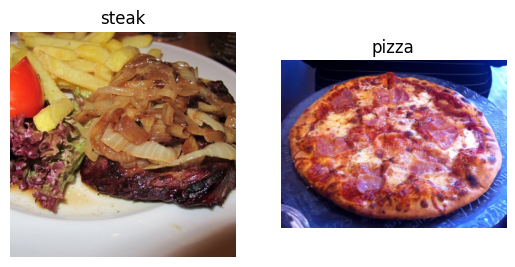

In [21]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image('pizza_steak/train', 'steak')
plt.subplot(1, 2, 2)
pizza_image = view_random_image('pizza_steak/train', 'pizza')

### 2. Preprocess the images

In [22]:
# Define directory dataset paths
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

Our next step is to turn our data into batches.

A batch is a small subset of data. Rather than look at all ~10000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10000 images or more might not fit into the memory of your GPU or processor
2. Trying to learn the patterns in 10000 in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...

In [23]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of a train data batch
images, labels = train_data.next() # Get the next batch of images and labels pair

len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data)

47

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.08627451, 0.04313726, 0.05882353],
          [0.1137255 , 0.06666667, 0.07450981],
          [0.14901961, 0.09019608, 0.07843138],
          ...,
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412]],
 
         [[0.1254902 , 0.09019608, 0.05490196],
          [0.16862746, 0.11764707, 0.08627451],
          [0.22352943, 0.15686275, 0.1254902 ],
          ...,
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412]],
 
         [[0.13725491, 0.10196079, 0.04313726],
          [0.18039216, 0.1254902 , 0.07450981],
          [0.227451  , 0.16470589, 0.10588236],
          ...,
          [0.05882353, 0.02352941, 0.03529412],
          [0.05882353, 0.02352941, 0.03529412],
          [0.05882353, 0.02352941, 0.03529412]],
 
         ...,
 
         [[0.9490197 , 0.9607844 , 0.8941177 ],
          [0.99215

In [29]:
images[7].shape

(224, 224, 3)

In [30]:
# View the first batch of labels
labels

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [31]:
# Make the creating of out model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# This model will be our baselin
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (only one output)
])

In [33]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit the model

In [34]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [35]:
# Fit the model
history_4 = model_4.fit(train_data, # Combinations of labels and sample data
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 111s 2s/step - loss: 0.9652 - accuracy: 0.6100 - val_loss: 0.5098 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 109s 2s/step - loss: 0.5070 - accuracy: 0.7500 - val_loss: 0.5373 - val_accuracy: 0.6940
Epoch 3/5
47/47 [==============================] - 111s 2s/step - loss: 0.3670 - accuracy: 0.8413 - val_loss: 0.4141 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 108s 2s/step - loss: 0.2217 - accuracy: 0.9213 - val_loss: 0.4550 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 125s 3s/step - loss: 0.0951 - accuracy: 0.9713 - val_loss: 0.6538 - val_accuracy: 0.7680


### 5. Evaluating our model

It looks like our model is learning something. Let's evaluate it

<Axes: >

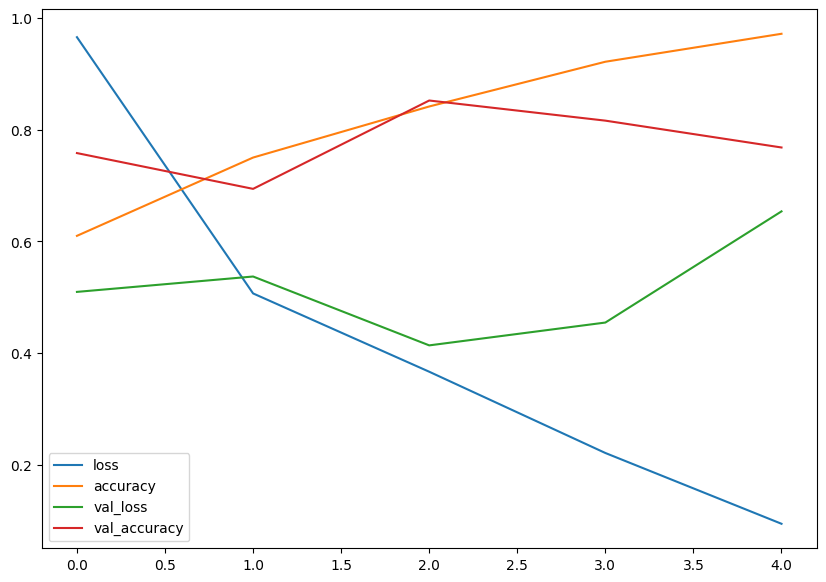

In [36]:
# Let's plot the training curves
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [37]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

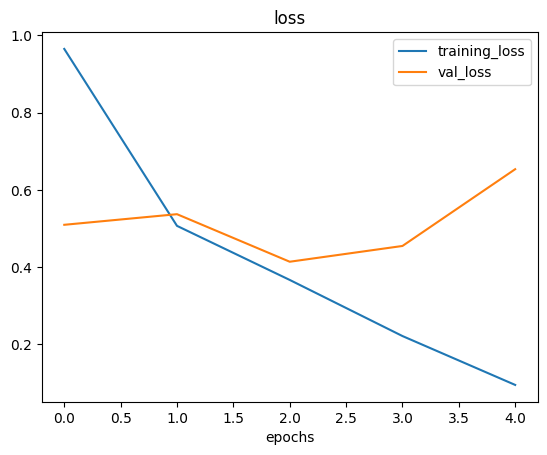

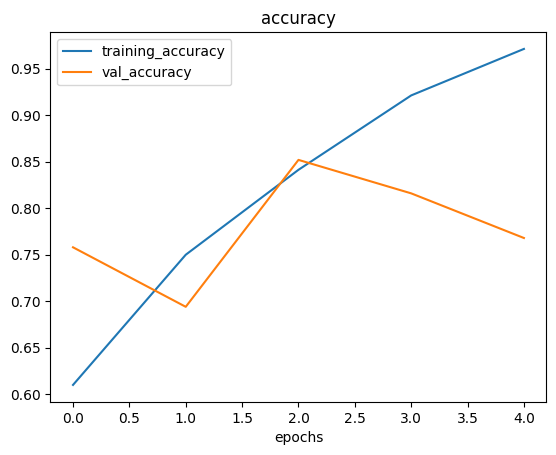

In [38]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

# The model is slightly overfitting so it would be bad on unseen data

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data ...

**Note:**
Reducing overfitting is also known as **regularization**

In [39]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [40]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [41]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 49s 1s/step - loss: 0.6333 - accuracy: 0.6473 - val_loss: 0.4814 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 48s 1s/step - loss: 0.4796 - accuracy: 0.7760 - val_loss: 0.5144 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 57s 1s/step - loss: 0.4578 - accuracy: 0.7980 - val_loss: 0.3861 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 62s 1s/step - loss: 0.4065 - accuracy: 0.8293 - val_loss: 0.3497 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 46s 987ms/step - loss: 0.3907 - accuracy: 0.8353 - val_loss: 0.3456 - val_accuracy: 0.8520


In [42]:
# Get the summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [43]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


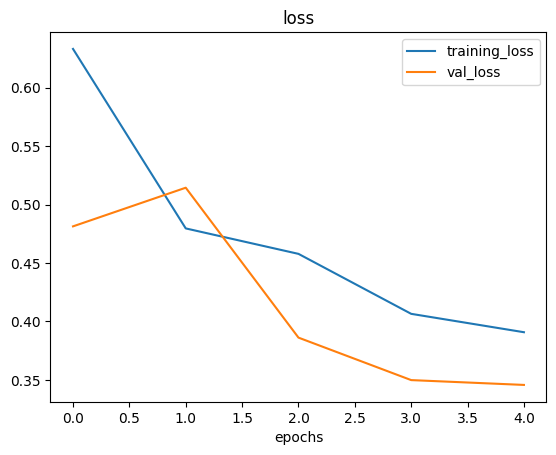

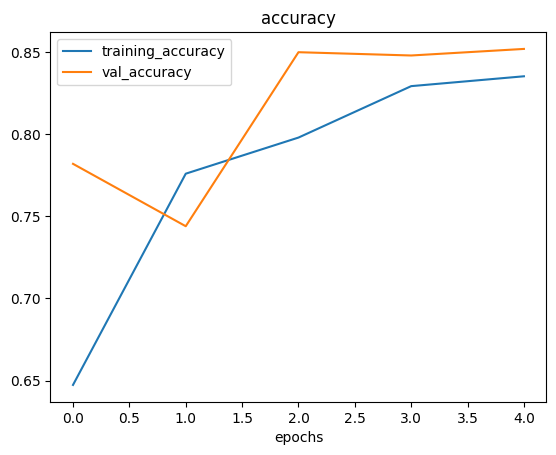

In [44]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [45]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Also for the test data set
test_datagen = ImageDataGenerator(rescale=1/255.)

What is data augmentation?

The process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation.

In [46]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                class_mode='binary',
                                                                shuffle=True) # For demonstration purposes only

# Create non-augmented train data batches
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               shuffle=True)

# Create non-augmented test data batches
print('Non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


Data augmentation is only performed on the training data. Using ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally let's visualize some augmented data

Showing image number: 0


(-0.5, 223.5, 223.5, -0.5)

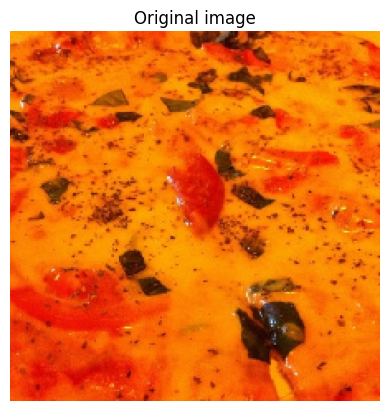

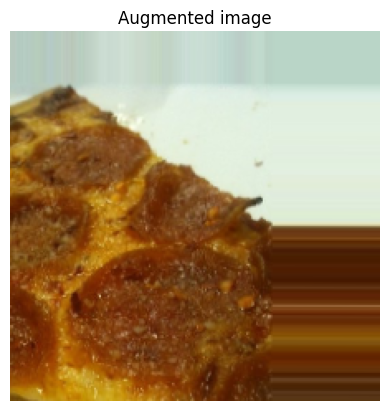

In [47]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, _ = train_data_augmented.next()
# labels aren't augmented, only data images

# Show the original and augmented image
import random
random_number = random.randint(0, 32)

print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [48]:
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
            epochs=20,
            steps_per_epoch=len(train_data_augmented),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/20
47/47 [==============================] - 67s 1s/step - loss: 0.6894 - accuracy: 0.5280 - val_loss: 0.6377 - val_accuracy: 0.6660
Epoch 2/20
47/47 [==============================] - 64s 1s/step - loss: 0.5851 - accuracy: 0.7020 - val_loss: 0.3976 - val_accuracy: 0.8520
Epoch 3/20
47/47 [==============================] - 64s 1s/step - loss: 0.5152 - accuracy: 0.7527 - val_loss: 0.3588 - val_accuracy: 0.8600
Epoch 4/20
47/47 [==============================] - 62s 1s/step - loss: 0.5050 - accuracy: 0.7627 - val_loss: 0.3984 - val_accuracy: 0.8340
Epoch 5/20
47/47 [==============================] - 66s 1s/step - loss: 0.4774 - accuracy: 0.7800 - val_loss: 0.3717 - val_accuracy: 0.8520
Epoch 6/20
47/47 [==============================] - 64s 1s/step - loss: 0.4669 - accuracy: 0.7940 - val_loss: 0.3828 - val_accuracy: 0.8320
Epoch 7/20
47/47 [==============================] - 67s 1s/step - loss: 0.4782 - accuracy: 0.7787 - val_loss: 0.3167 - val_accuracy: 0.8840
Epoch 8/20
47/47 [==

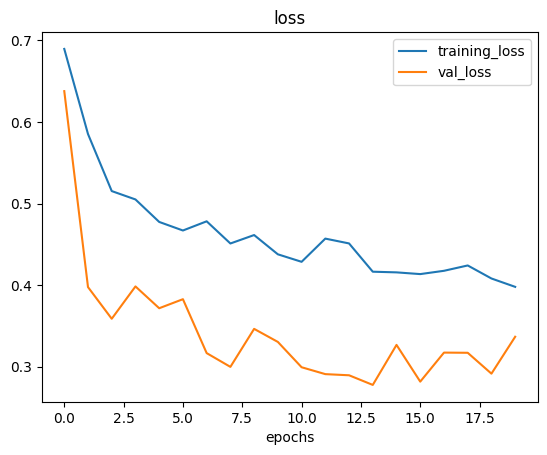

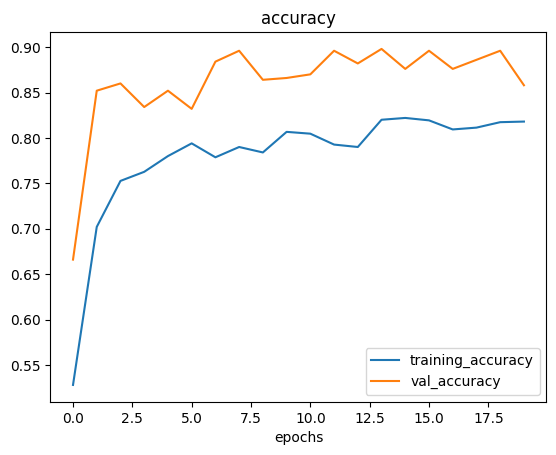

In [49]:
# Check our models training curves
plot_loss_curves(history_6)

### 7. Repeat until satisfied

Shince we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers
* Increase the number of gilters in each convolutional layer
* Train for longer
* Find an ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another image model has learn and adjust it for our model

**Practice: ** Recreate the model to have 95%+ accuracy on validation data

## Making a prediction with our training model on our own custom data

In [50]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [56]:
# View our example image
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2024-05-13 16:28:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  8.95MB/s    in 0.2s    

2024-05-13 16:28:43 (8.95 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



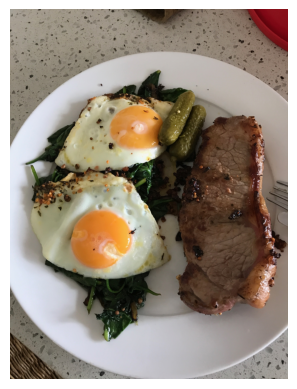

In [57]:
plt.imshow(steak)
plt.axis(False);

In [58]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data it is important that your custom data is preprocessed into the same format as the data your model was trained on.

In [59]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to
  (img_shape, img_shape, color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image and get all values between 0 and 1
  img = img / 255.

  return img

In [60]:
steak_prep = load_and_prep_image('03-steak.jpeg')

steak_prep.shape

TensorShape([224, 224, 3])

In [67]:
prediction = model_6.predict(tf.expand_dims(steak_prep, axis=0))
prediction

1/1 [==============================] - 0s 28ms/step


array([[0.92172456]], dtype=float32)

In [70]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(prediction))]
pred_class

'steak'

In [113]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """

  # Import and preprocess the image
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(class_names) > 2:
    pred_class = class_names[int(tf.argmax(pred[0]))]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 130ms/step


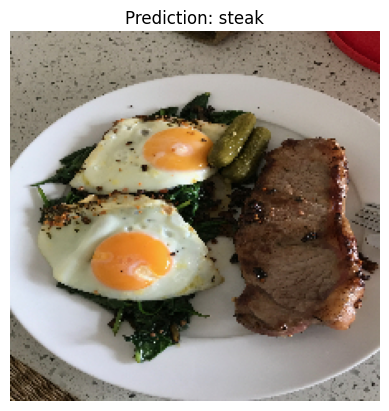

In [73]:
pred_and_plot(model_6, '03-steak.jpeg')

--2024-05-13 17:30:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  12.3MB/s    in 0.2s    

2024-05-13 17:30:44 (12.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 46ms/step


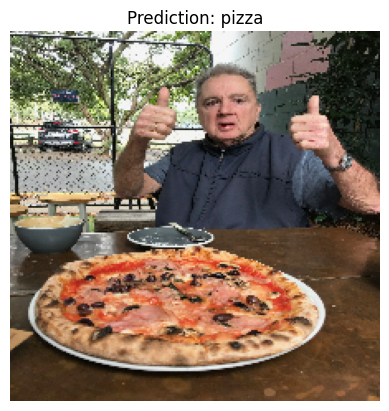

In [74]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_6, '03-pizza-dad.jpeg')

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem. Now we're going to step things up a notch with 10 classes of food.

1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model
7. Repeat until satisfied

In [75]:
## 1. Import and become one with the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2024-05-13 17:43:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.207, 74.125.203.207, 74.125.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.4MB/s    in 24s     

2024-05-13 17:44:06 (20.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [76]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}"')

There are 2 directories and 0 images in "10_food_classes_all_data"
There are 10 directories and 0 images in "10_food_classes_all_data/test"
There are 0 directories and 250 images in "10_food_classes_all_data/test/chicken_wings"
There are 0 directories and 250 images in "10_food_classes_all_data/test/pizza"
There are 0 directories and 250 images in "10_food_classes_all_data/test/grilled_salmon"
There are 0 directories and 250 images in "10_food_classes_all_data/test/ice_cream"
There are 0 directories and 250 images in "10_food_classes_all_data/test/fried_rice"
There are 0 directories and 250 images in "10_food_classes_all_data/test/steak"
There are 0 directories and 250 images in "10_food_classes_all_data/test/ramen"
There are 0 directories and 250 images in "10_food_classes_all_data/test/chicken_curry"
There are 0 directories and 250 images in "10_food_classes_all_data/test/sushi"
There are 0 directories and 250 images in "10_food_classes_all_data/test/hamburger"
There are 10 directori

In [77]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [78]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3673579.jpg']
Image shape: (512, 384, 3)


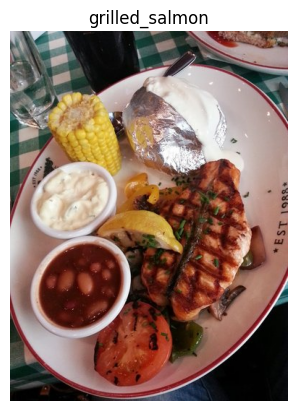

In [95]:
# Visualize the data
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about CNN explainer. How about we just take their model also on 10 classes and use it for our problem?

In [100]:
from tensorflow.keras import Sequential
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import (Conv2D,
                                     MaxPool2D,
                                     Flatten,
                                     Dense,
                                     Activation)

model_11 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(relu),
    Conv2D(10, 3),
    Activation(relu),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(relu),
    Conv2D(10, 3),
    Activation(relu),
    MaxPool2D(),
    Flatten(),
    Dense(10),
    Activation(softmax)
])

model_11.compile(loss=CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])

In [102]:
history_11 = model_11.fit(train_data,
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 488s 2s/step - loss: 2.1425 - accuracy: 0.2199 - val_loss: 2.0285 - val_accuracy: 0.2716
Epoch 2/5
235/235 [==============================] - 524s 2s/step - loss: 1.8883 - accuracy: 0.3525 - val_loss: 1.9892 - val_accuracy: 0.2920
Epoch 3/5
235/235 [==============================] - 555s 2s/step - loss: 1.4709 - accuracy: 0.5047 - val_loss: 2.1007 - val_accuracy: 0.2944
Epoch 4/5
235/235 [==============================] - 549s 2s/step - loss: 0.7616 - accuracy: 0.7535 - val_loss: 2.9587 - val_accuracy: 0.2676
Epoch 5/5
235/235 [==============================] - 468s 2s/step - loss: 0.2539 - accuracy: 0.9241 - val_loss: 4.0609 - val_accuracy: 0.2540


### 5. Evaluate the model

In [103]:
# Evaluate on the test data
model_11.evaluate(test_data)

79/79 [==============================] - 48s 605ms/step - loss: 4.0609 - accuracy: 0.2540


[4.060887336730957, 0.2540000081062317]

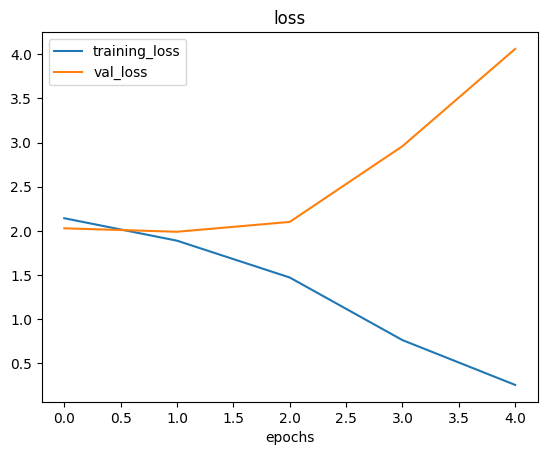

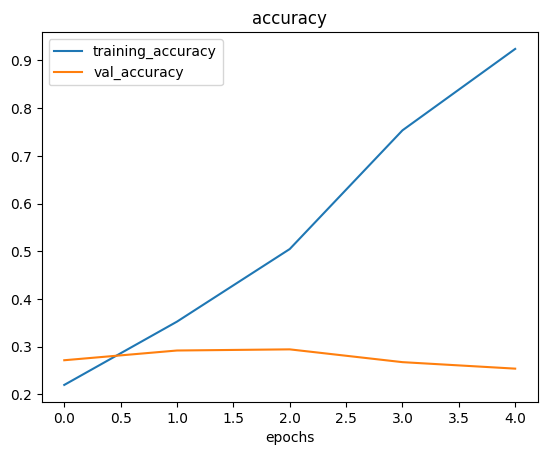

In [104]:
# Check out the model's loss curves
plot_loss_curves(history_11)

Loss curves tell us that the model is overfitting. It's getting great results on training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters to reduce overfitting

Due to its performance on the trianing data, it's clear our model is learning something.
However, it's not generalizing well to unseen data (overfitting).
Let's try and fix overfitting with:

* Get more data
* Simplify the model - if our current model is overfitting the data it may be too complicated. Maybe reduce number of layers or reduce number of hidden units in layers
* Use data augmentation - manipulates the training data in such a way to add more diversity to it
* Use transfer learning - transfer learning leverages patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [110]:
# Let's simplify the model first
model_12 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(relu),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(relu),
    MaxPool2D(),
    Flatten(),
    Dense(10),
    Activation(softmax)
])

model_12.compile(loss=CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])

# history_12 = model_12.fit(train_data,
#              epochs=5,
#              steps_per_epoch=len(train_data),
#              validation_data=test_data,
#              validation_steps=len(test_data))

This basically makes loss curves fall, not get better. Let's try with data augmentation

In [107]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [112]:
# Let's simplify the model first
model_13 = tf.keras.models.clone_model(model_12)

model_13.compile(loss=CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])

history_13 = model_13.fit(train_data_augmented,
             epochs=5,
             steps_per_epoch=len(train_data_augmented),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 373s 2s/step - loss: 2.1791 - accuracy: 0.2111 - val_loss: 2.0171 - val_accuracy: 0.2808
Epoch 2/5
235/235 [==============================] - 302s 1s/step - loss: 2.0461 - accuracy: 0.2791 - val_loss: 1.9022 - val_accuracy: 0.3436
Epoch 3/5
235/235 [==============================] - 305s 1s/step - loss: 2.0020 - accuracy: 0.2939 - val_loss: 1.9055 - val_accuracy: 0.3432
Epoch 4/5
235/235 [==============================] - 302s 1s/step - loss: 1.9597 - accuracy: 0.3192 - val_loss: 1.8243 - val_accuracy: 0.3760
Epoch 5/5
235/235 [==============================] - 301s 1s/step - loss: 1.9342 - accuracy: 0.3367 - val_loss: 1.8756 - val_accuracy: 0.3396


In [ ]:
pred_and_plot(model_13, '03-pizza-dad.jpeg', class_names=class_names)